In [1]:
import pandas as pd
import numpy as np
from os import path
from scipy.signal import resample
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
mpl.style.use('seaborn-notebook')
#sorted(mpl.style.available)


#adding local modules
import sys
module_path = path.abspath(path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from preprocess.biodarw_feature_extraction import extract_residues, extract_radio
from utils import load_biodarw

# setting up variables
doc_path = "/data/elekin/doc"
coefficients=17
et = "T001"
ct ="C01"

%matplotlib inline

Loading previously extracted features from radius and residues from Discrete Cosine Transform. They were in hdf5 format. The file contains the following datasets:

* /source/dataset: origin raw data
* /source/labels: original labels ET-1 and CT-0
* /result/radius/r: radius
* /result/radius/features: temporal and frequency fetures extracted from radius
* /result/residues/rd: residues
* /result/residues/features: temporal and frequency fetures extracted from residues


In [2]:
metadf=pd.read_csv(path.join("/data/elekin/doc","metadata-202106-v1.csv"),index_col=0)
metadf.head(16)

,abs_path,relative_path,temblor,Sexo,TRS,age,level
name,,,,,,,
C01_1,/data/elekin/data/origin/ethw/Controles30jun14...,C01/session00002/u00003s00002_hw000011.svc,no,F,0,27,0
C01_2,/data/elekin/data/origin/ethw/Controles30jun14...,C01/session00002/u00003s00002_hw000012.svc,no,F,0,27,0
C02_1,/data/elekin/data/origin/ethw/Controles30jun14...,C02/session00001/u00004s00001_hw000011.svc,no,F,0,29,0
C02_2,/data/elekin/data/origin/ethw/Controles30jun14...,C02/session00001/u00004s00001_hw000012.svc,no,F,0,29,0
C03_1,/data/elekin/data/origin/ethw/Controles30jun14...,C03/session00001/u00005s00001_hw000011.svc,no,F,0,32,0
C03_2,/data/elekin/data/origin/ethw/Controles30jun14...,C03/session00001/u00005s00001_hw000012.svc,no,F,0,32,0
C04_1,/data/elekin/data/origin/ethw/Controles30jun14...,C04/session00001/u00006s00001_hw000011.svc,no,M,0,32,0
C04_2,/data/elekin/data/origin/ethw/Controles30jun14...,C04/session00001/u00006s00001_hw000012.svc,no,M,0,32,0
C05_1,/data/elekin/data/origin/ethw/Controles30jun14...,C05/session00001/u00007s00001_hw000011.svc,no,M,0,22,0


In [3]:
dataset=load_biodarw(metadf.index, metadf['abs_path'])

Loading labels based on clinic, residues and features from residues.


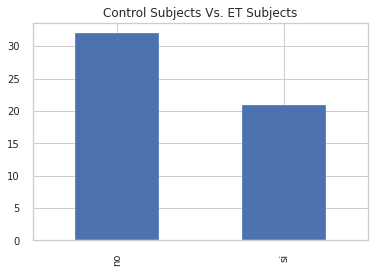

In [4]:
y = metadf['temblor']
ax = y.value_counts().plot.bar(title='Control Subjects Vs. ET Subjects')

In [5]:
rd = dataset.groupby('subject_id').apply(extract_residues, c=coefficients).apply(resample, num=4096)
rd_rd = pd.DataFrame(rd.tolist(), index=rd.index)
rd_rd.head(16)

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
subject_id,,,,,,,,,,,,,,,,,,,,,
C01_1,2616.494977,2603.574851,2615.779950,2624.033204,2618.051843,2611.919996,2615.301600,2619.929647,2617.352375,2612.779288,...,2710.031486,2708.866591,2713.750870,2716.039478,2709.186923,2704.188985,2713.697295,2724.906692,2709.008099,2661.917377
C01_2,4167.778042,4191.983504,4167.788500,4153.906841,4166.734844,4175.513013,4165.897571,4158.578102,4165.571963,4171.245721,...,3992.037378,3998.828241,3992.366378,3983.943586,3992.937826,4005.511142,3991.993073,3968.344815,3992.445994,4079.987502
C02_1,2316.313494,2255.653513,2288.636990,2338.955456,2346.077098,2316.014762,2294.409265,2305.277421,2328.560089,2333.421467,...,2656.925026,2687.498288,2694.523426,2676.595863,2671.904250,2713.305348,2774.437250,2777.527899,2668.200991,2480.439478
C02_2,3810.389867,3799.250359,3809.251681,3812.917888,3804.898521,3800.272263,3803.247152,3803.214081,3796.953952,3792.505681,...,3888.587302,3884.934062,3886.722941,3891.707131,3889.247678,3882.607761,3887.016589,3898.511396,3889.736159,3850.682162
C03_1,2267.141506,2249.673932,2266.871954,2277.587148,2268.662020,2260.977152,2266.722216,2272.881263,2268.971102,2263.949978,...,2361.801503,2358.315537,2365.294818,2371.338872,2364.812912,2360.305239,2378.474975,2402.913606,2389.741610,2329.063761
C03_2,3811.550394,3809.392096,3812.793686,3814.089044,3812.806864,3813.263648,3815.586251,3816.831202,3816.804984,3816.932940,...,3831.898004,3831.623686,3831.343367,3832.380240,3832.652731,3831.082385,3831.142307,3833.601195,3831.787894,3821.906755
C04_1,2514.144329,2512.230656,2514.624837,2515.053243,2513.576047,2513.685876,2514.675936,2514.300085,2513.653502,2514.138691,...,2521.099771,2520.918384,2520.489926,2521.706256,2522.571136,2521.283624,2521.558542,2525.743593,2527.723924,2522.020953
C04_2,3832.845898,3826.680837,3836.820798,3829.918422,3831.296303,3833.640764,3828.979551,3832.515552,3833.491962,3830.931258,...,3894.473115,3891.903663,3894.271819,3894.244339,3891.253381,3896.260209,3892.679320,3890.468637,3902.923123,3880.488017
C05_1,2347.636091,2339.751504,2350.684227,2350.490043,2344.732659,2347.386162,2350.201973,2347.150553,2346.675543,2349.464264,...,2422.373702,2420.083436,2412.710935,2413.069001,2418.294056,2413.879559,2410.047716,2421.093235,2422.210202,2388.035153


In [6]:
rd_rd.shape

(53, 4096)

## Residues Analysis based on Pearson Correlation

As the first step we can try to visualy identify correlation between features and also with target class

0.46827977711140484

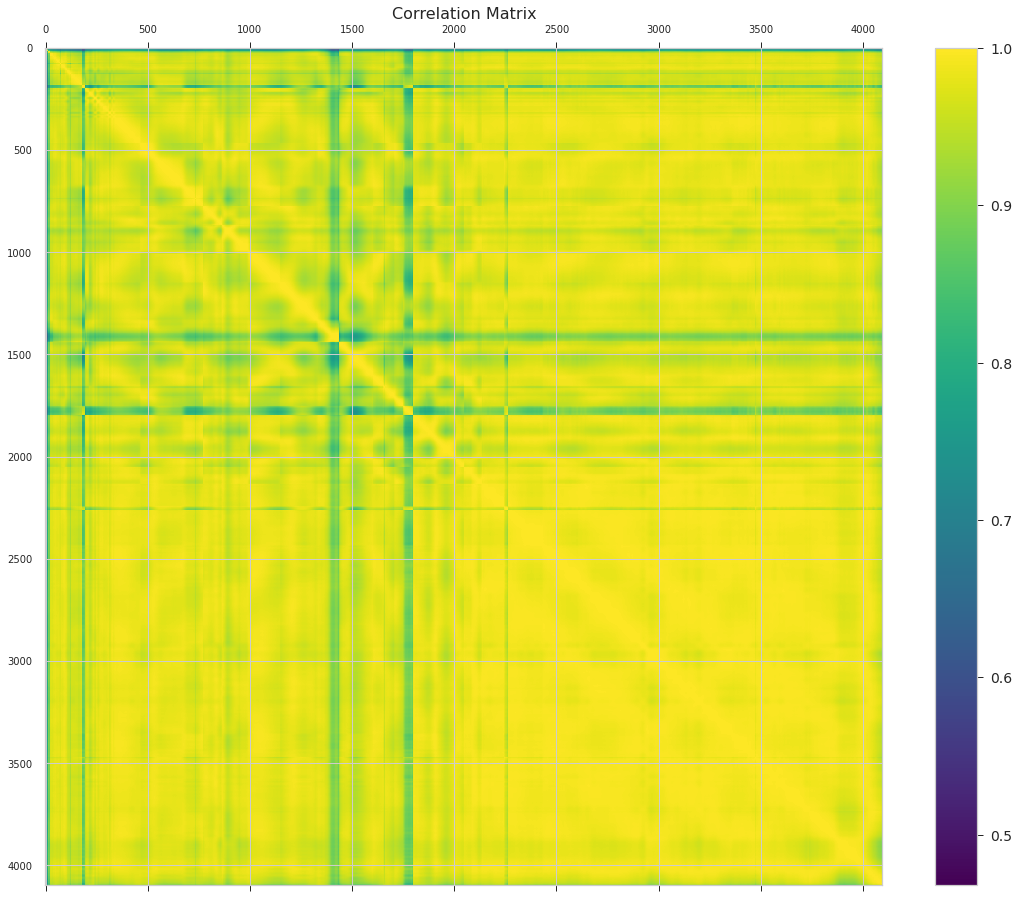

In [7]:
df=rd_rd
f = plt.figure(figsize=(19, 15))
corrMatrix = df.corr("pearson")
plt.matshow(corrMatrix, fignum=f.number, cmap="viridis")
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);
corrMatrix.abs().min().min()

There is strong correlation between all the data points

In [8]:
labels = (metadf["temblor"] == 'si').astype('int8')
labels.values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int8)

In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
random_state = 0

X_train=rd_rd
y_train=labels.values

In [10]:
# Reduce dimension with LDA
lda = LinearDiscriminantAnalysis(n_components=1)
lda.fit(X_train, y_train)
X_train_lda=lda.transform(X_train)

In [11]:
df_lda=pd.DataFrame(X_train_lda, columns=["component1"])
df_lda["labels"]=y_train.T
df_lda.head()

,component1,labels
0,-1.762665,0
1,0.046930,0
2,-0.638309,0
3,-1.815835,0
4,-1.395724,0


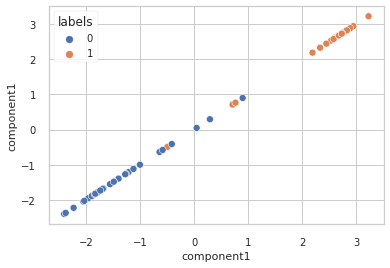

In [12]:
_=sns.scatterplot(data=df_lda, x="component1", y="component1", hue="labels")

In [13]:
# Reduce dimension to 2 with PCA
pca = make_pipeline(StandardScaler(),
                    PCA(n_components=3, random_state=random_state))
# Fit the method's model
pca.fit(X_train, y_train)
X_train_pca=pca.transform(X_train)

In [14]:
df_pca=pd.DataFrame(X_train_pca, columns=["PCA0", "PCA1","PCA2"])
df_pca["labels"]=y_train.T
df_pca.head()

,PCA0,PCA1,PCA2,labels
0,-60.821691,-0.796036,-0.102813,0
1,53.451233,-0.969152,0.873953,0
2,-69.112823,0.445936,0.005455,0
3,36.242530,0.666451,1.532776,0
4,-77.350475,0.260467,-0.713009,0


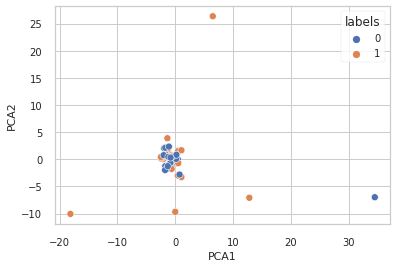

In [15]:
_=sns.scatterplot(data=df_pca, x="PCA1", y="PCA2", hue="labels")

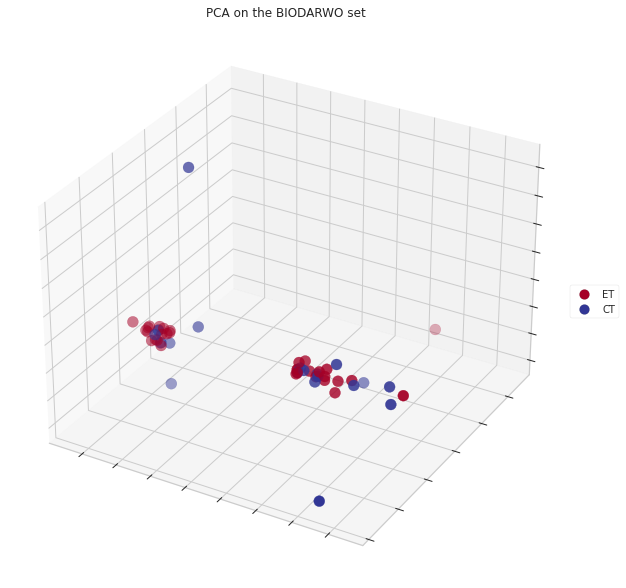

In [16]:
# Plot initialisation
fig = plt.figure(figsize=(10,15))
ax = fig.add_subplot(111, projection='3d')


sc=ax.scatter(df_pca['PCA0'], 
              df_pca['PCA1'], 
              df_pca['PCA2'], c=df_pca.labels, cmap="RdYlBu", s=120)
    
# label the axes
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_zlabel(None)
ax.set_title("PCA on the BIODARWO set")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

colors = [sc.cmap(sc.norm(i)) for i in [0.0, 1.0]]

custom_lines = [plt.Line2D([],[], ls="", marker='.', 
                mec='k', mfc=c, mew=.1, ms=20) for c in colors]

ax.legend(custom_lines, ['ET','CT'], loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [17]:
from sklearn.model_selection import LeaveOneOut, KFold
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

score='accuracy'
X = X_train_lda
y = y_train

loo = LeaveOneOut()

In [18]:
# predictive model
clf = SVC(kernel='rbf', gamma=0.2, C=10**3)

cv = cross_validate(clf, X, y, cv=loo, scoring=score, return_train_score=True, n_jobs=-1)
print("train score svm: {}".format(cv['train_score'].mean()))
print("test score svm: {}".format(cv['test_score'].mean()))


train score svm: 0.9433962264150945
test score svm: 0.9056603773584906


In [19]:
# RandomForest
clf = RandomForestClassifier(n_estimators=30)

cv = cross_validate(clf, X, y, cv=loo, scoring=score, return_train_score=True, n_jobs=-1)

print("train score RandomForest: {}".format(cv['train_score'].mean()))
print("test score RandomForest: {}".format(cv['test_score'].mean()))

train score RandomForest: 0.9960087082728593
test score RandomForest: 0.8867924528301887


In [20]:
# Knn
clf = KNeighborsClassifier(n_neighbors=5, algorithm='ball_tree', metric='euclidean')

cv = cross_validate(clf, X, y, cv=loo, scoring=score, return_train_score=True, n_jobs=-1)

print("train score knn: {}".format(cv['train_score'].mean()))
print("test score knn: {}".format(cv['test_score'].mean()))

train score knn: 0.9238026124818576
test score knn: 0.9056603773584906


In [21]:
# predictive model
clf = LDA()

cv = cross_validate(clf, X, y, cv=loo, scoring=score, return_train_score=True, n_jobs=-1)

print("train score LDA: {}".format(cv['train_score'].mean()))
print("test score LDA: {}".format(cv['test_score'].mean()))

train score LDA: 0.9433962264150945
test score LDA: 0.9433962264150944
